## Exemple d'ensemble methods io random forests

En aquest exemple usarem la mateixa base de dades de càncer de pit que vam utilitzar per a l'avaluació de models.

Inicialment carregarem les funcions i paquets que usarem durant aquest codi

In [1]:
# funcions i paquets per a visualitzacio
import matplotlib.pyplot as plt

# paquet per a manipulacio de dades
import pandas as pd

import numpy as np

# funcions i paquets per a carregar datasets especifics (exemples simples)
from sklearn import datasets

# funcions per a partició de dades
from sklearn.model_selection import train_test_split
# funcions per a classificacio kNN
from sklearn.tree import DecisionTreeClassifier
# funcions per a metriques de rendiment
from sklearn.metrics import accuracy_score,  precision_score, roc_curve,roc_auc_score, auc
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

#funcions per a la validació creuada
from sklearn.model_selection import cross_val_score

In [2]:
# import some data to play with
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: {cancer.feature_names}')

tamany de les dades: (569, 30)
Caracteristiques: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
#trenquem el conjunt en 55% training i 45% test
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Aquesta vegada el nostre classificador és un arbre de decisió

La taxa d'error és de: 5.3040582212902425%


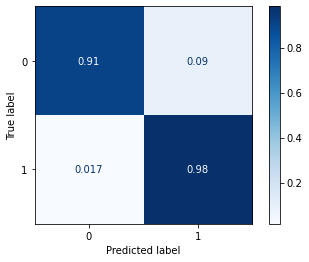

In [4]:
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

error = plot_confusion_matrix(dec_tree, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))


print(f"La taxa d'error és de: {error*100}%")

## Adaboost:

La taxa d'error és de: 3.558653015912172%


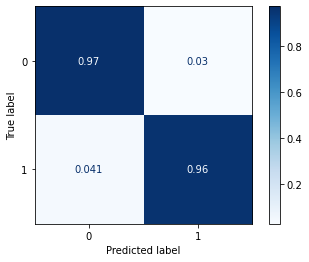

In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(x_test)

error = plot_confusion_matrix(ada_boost, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))


print(f"La taxa d'error és de: {error*100}%")

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc = []
sco = []
scomean = []
for T in range(25,251,25):
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=T)
    ada_boost.fit(x_train, y_train)
    y_pred = ada_boost.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    sco.append(cross_val_score(ada_boost, x_train, y_train, cv = 5, scoring='accuracy'))
    scomean.append(cross_val_score(ada_boost, x_train, y_train, cv = 5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

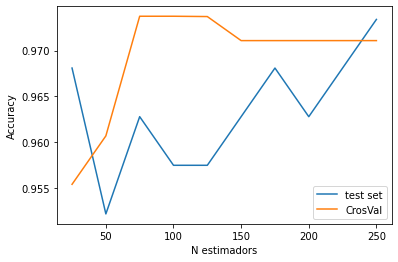

In [7]:
plt.plot(range(25,251,25), acc, label='test set')
plt.plot(range(25,251,25), scomean, label='CrosVal')
plt.legend()
plt.xlabel('N estimadors')
plt.ylabel('Accuracy')

n_estimators = 25: ROC AUC=0.997
n_estimators = 50: ROC AUC=0.986
n_estimators = 75: ROC AUC=0.992
n_estimators = 100: ROC AUC=0.992
n_estimators = 125: ROC AUC=0.992
n_estimators = 150: ROC AUC=0.994
n_estimators = 175: ROC AUC=0.995
n_estimators = 200: ROC AUC=0.995
n_estimators = 225: ROC AUC=0.996
n_estimators = 250: ROC AUC=0.996


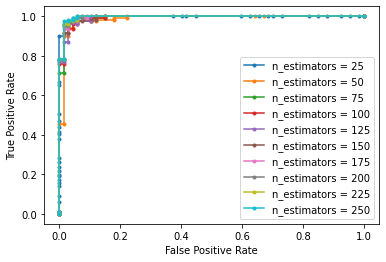

In [8]:
for T in range(25,251,25):
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=T)
    ada_boost.fit(x_train, y_train)
    # predict probabilities
    lr_probs = ada_boost.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('n_estimators = %2d: ROC AUC=%.3f' % (T,lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(lr_fpr, lr_tpr, marker='.', label='n_estimators = %2d' % T)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Random Forest:

La taxa d'error és de: 3.3982977673615355%


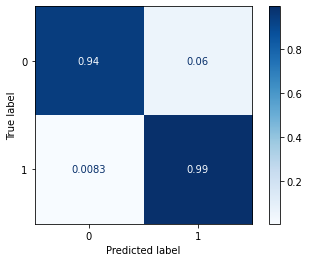

In [9]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=150, max_features=0.1, random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)


error = plot_confusion_matrix(random_forest, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))


print(f"La taxa d'error és de: {error*100}%")

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc = []
sco = []
scomean = []
for T in range(10,201,20):
    random_forest = RandomForestClassifier(n_estimators=T, max_features=0.1, random_state=42)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    sco.append(cross_val_score(random_forest, x_train, y_train, cv = 10, scoring='accuracy'))
    scomean.append(cross_val_score(random_forest, x_train, y_train, cv = 10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

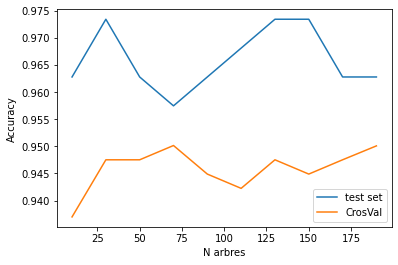

In [11]:
plt.plot(range(10,201,20), acc, label='test set')
plt.plot(range(10,201,20), scomean, label='CrosVal')
plt.legend()
plt.xlabel('N arbres')
plt.ylabel('Accuracy')

n_estimators = 10: ROC AUC=0.995
n_estimators = 30: ROC AUC=0.996
n_estimators = 50: ROC AUC=0.996
n_estimators = 70: ROC AUC=0.996
n_estimators = 90: ROC AUC=0.996
n_estimators = 110: ROC AUC=0.996
n_estimators = 130: ROC AUC=0.996
n_estimators = 150: ROC AUC=0.997
n_estimators = 170: ROC AUC=0.996
n_estimators = 190: ROC AUC=0.996


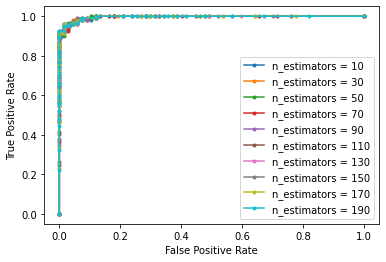

In [12]:
for T in range(10,201,20):
    random_forest = RandomForestClassifier(n_estimators=T, max_features=0.1, random_state=42)
    random_forest.fit(x_train, y_train)
    # predict probabilities
    lr_probs = random_forest.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('n_estimators = %2d: ROC AUC=%.3f' % (T,lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(lr_fpr, lr_tpr, marker='.', label='n_estimators = %2d' % T)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Importància de les característiques
Es pot analitzar quin és el pes de cada característica en la solució final.

range(0, 30)
30
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 

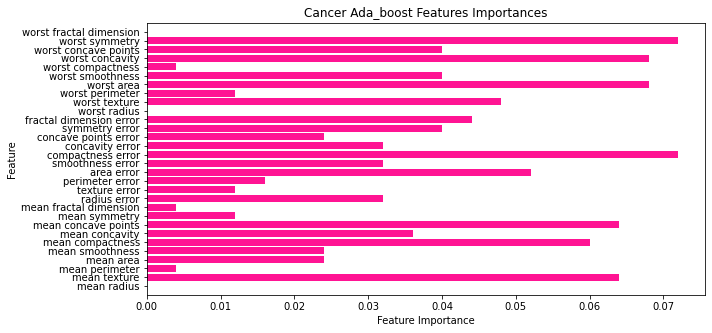

range(0, 30)
30
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 

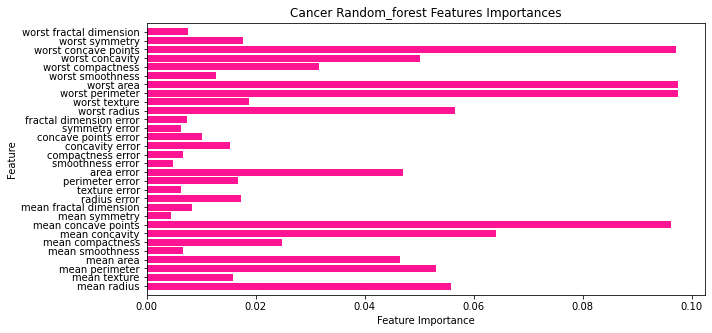

In [18]:
def breast_cancer_feature_importances_plot(model,nom_model):
    plt.figure(figsize=(10,5))
    n_features = len(cancer.feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF1493'])
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.title('Cancer ' + str(nom_model)+ ' Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    print(range(n_features))
    print(len(model.feature_importances_))
    print(cancer)


    
breast_cancer_feature_importances_plot(ada_boost,'Ada_boost')
plt.show()    
    
breast_cancer_feature_importances_plot(random_forest,'Random_forest')
plt.show()